# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [89]:
import sympy as sp

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
g = -x**3 + 5*x - 7*x**2 + 17
h = x**2 - 1/x
j = 1/x**5 + x**17 + 8

functions = [f, g, h, j]

for func in functions:
    fprime = sp.diff(func, x)
    critical_points = sp.solve(sp.Eq(fprime, 0), x)
    print("Функция:", func)
    print("Критические точки:", critical_points)
    fsecond = sp.diff(func, (x,2))

    for i in critical_points:
        val_second = fsecond.subs(x, i)
        if val_second > 0:
            print(f"Точка x={i} является локальным минимумом.")
        else:
            print(f"Точка x={i} является локальным максимумом.")
    print()

Функция: x**2 - 30*x + 1
Критические точки: [15]
Точка x=15 является локальным минимумом.

Функция: -x**3 - 7*x**2 + 5*x + 17
Критические точки: [-5, 1/3]
Точка x=-5 является локальным минимумом.
Точка x=1/3 является локальным максимумом.

Функция: x**2 - 1/x
Критические точки: [-2**(2/3)/2]
Точка x=-2**(2/3)/2 является локальным минимумом.

Функция: x**17 + 8 + x**(-5)
Критические точки: [-17**(21/22)*5**(1/22)/17, 17**(21/22)*5**(1/22)/17]
Точка x=-17**(21/22)*5**(1/22)/17 является локальным максимумом.
Точка x=17**(21/22)*5**(1/22)/17 является локальным минимумом.



## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [95]:
import sympy as sp

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
g = -x**3 + 5*x - 7*x**2 + 17
h = x**2 - 1/x
j = x**17 + 1/x**5 + 8

functions = [('f(x)', f), ('g(x)', g), ('h(x)', h), ('j(x)', j)]

for name, func in functions:
    fsecond = sp.diff(func, (x, 2))
    inflection_candidates = sp.solve(sp.Eq(fsecond, 0), x)
    print(name, "вторая производная:", fsecond)
    print("Кандидаты на точки перегиба:", inflection_candidates)
    for candidate in inflection_candidates:
        left_val = fsecond.subs(x, candidate - 0.001)
        right_val = fsecond.subs(x, candidate + 0.001)

        if left_val * right_val < 0:
            print(f"Точка x={candidate} является точкой перегиба.")
        else:
            print(f"Точка x={candidate} не меняет знак второй производной, возможно не перегиб.")

f(x) вторая производная: 2
Кандидаты на точки перегиба: []
g(x) вторая производная: -2*(3*x + 7)
Кандидаты на точки перегиба: [-7/3]
Точка x=-7/3 является точкой перегиба.
h(x) вторая производная: 2*(1 - 1/x**3)
Кандидаты на точки перегиба: [1]
Точка x=1 является точкой перегиба.
j(x) вторая производная: 2*(136*x**15 + 15/x**7)
Кандидаты на точки перегиба: []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

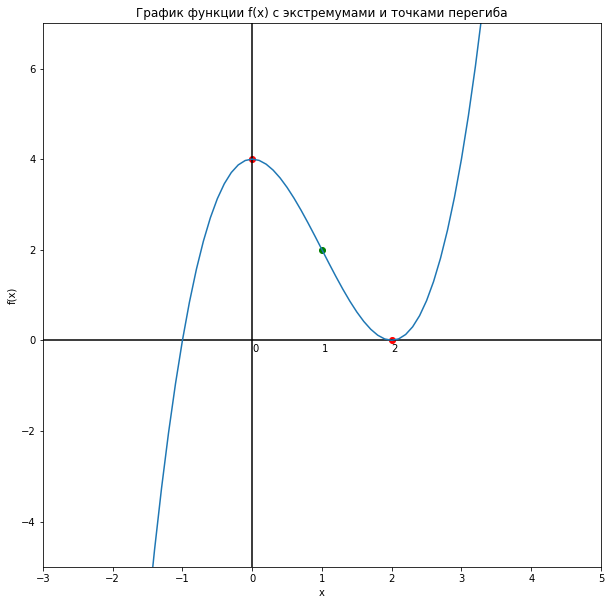

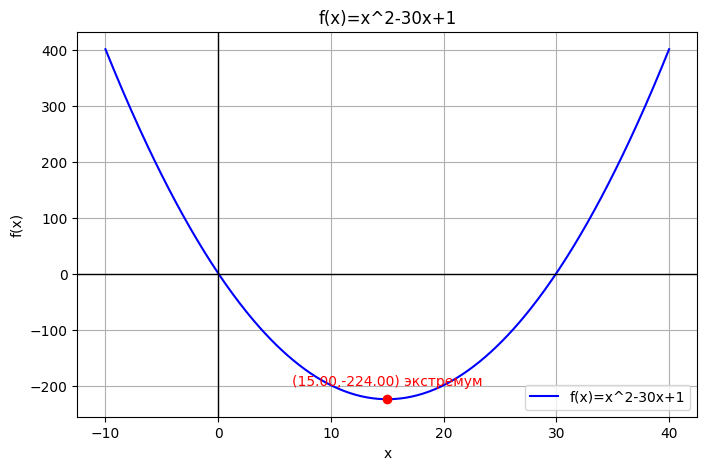

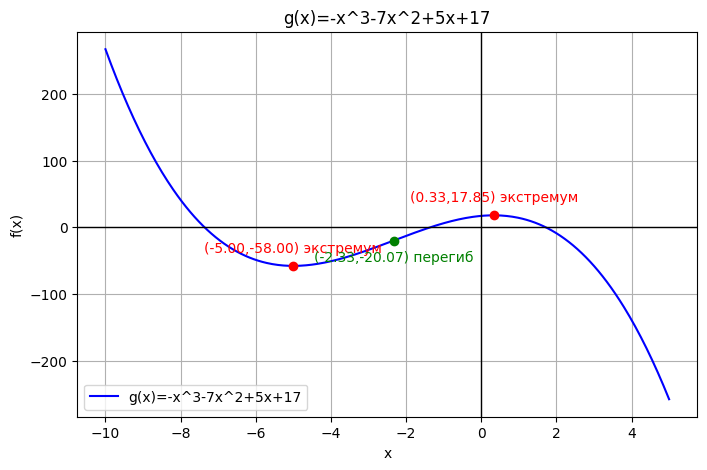

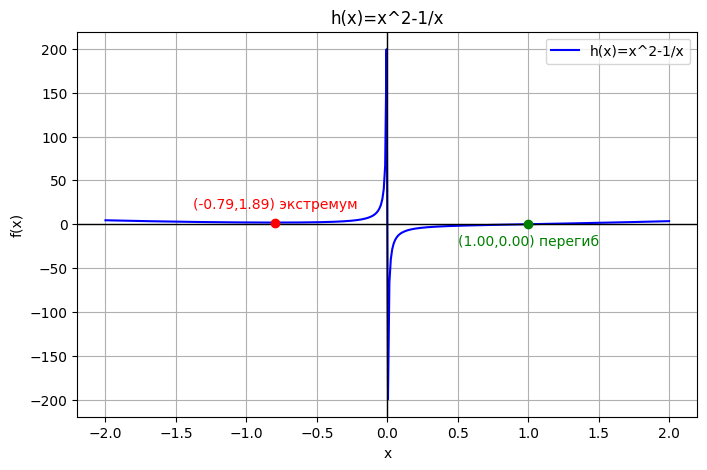

In [22]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x', real=True)
functions = [
    ("f(x)=x^2-30x+1", x**2 - 30*x + 1, (-10,40)),
    ("g(x)=-x^3-7x^2+5x+17", -x**3 - 7*x**2 + 5*x + 17, (-10,5)),
    ("h(x)=x^2-1/x", x**2 - 1/x, (-2,2)),
]

for title, func, (xmin, xmax) in functions:
    fprime = sp.diff(func, x)
    fsecond = sp.diff(func, (x, 2))

    critical_points = sp.solve(sp.Eq(fprime, 0), x)
    inflection_candidates = sp.solve(sp.Eq(fsecond, 0), x)

    f_lmbd = sp.lambdify(x, func, 'numpy')

    X = np.linspace(xmin, xmax, 400)
    Y = f_lmbd(X)

    plt.figure(figsize=(8,5))
    plt.plot(X, Y, label=title, color='blue')

    for c in critical_points:
        if c.is_real:
            cx = float(c)
            cy = f_lmbd(cx)
            plt.scatter(cx, cy, color='red', zorder=5)
            plt.annotate(f"({cx:.2f},{cy:.2f}) экстремум", (cx, cy),
                         textcoords="offset points", xytext=(0,10), ha='center', color='red')

    for i in inflection_candidates:
        if i.is_real:
            ix = float(i)
            iy = f_lmbd(ix)
            left_val = fsecond.subs(x, ix - 0.001)
            right_val = fsecond.subs(x, ix + 0.001)
            if left_val*right_val < 0:
                plt.scatter(ix, iy, color='green', zorder=5)
                plt.annotate(f"({ix:.2f},{iy:.2f}) перегиб", (ix, iy),
                             textcoords="offset points", xytext=(0,-15), ha='center', color='green')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1)
    plt.legend()
    plt.show()


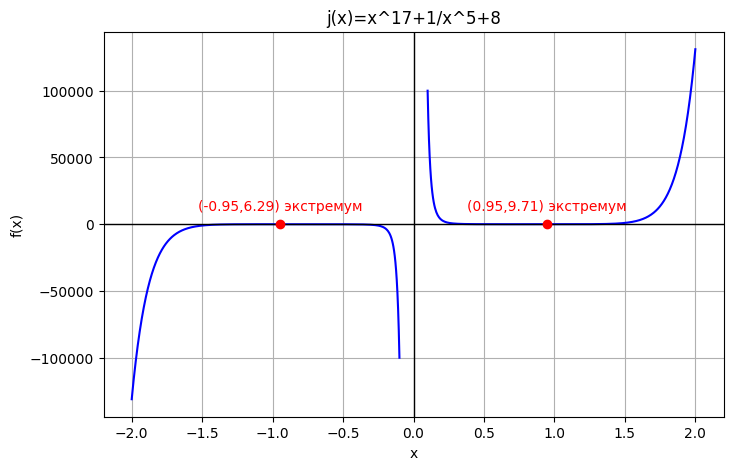

In [97]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x', real=True)
j = x**17 + 1/x**5 + 8


jp = sp.diff(j, x)
js = sp.diff(j, (x, 2))
critical_points = sp.solve(sp.Eq(jp, 0), x)
inflection_candidates = sp.solve(sp.Eq(js, 0), x)

j_lmbd = sp.lambdify(x, j, 'numpy')

X_neg = np.linspace(-2, -0.1, 400)
X_pos = np.linspace(0.1, 2, 400)

plt.figure(figsize=(8,5))

Y_neg = j_lmbd(X_neg)
plt.plot(X_neg, Y_neg, label='j(x) left side', color='blue')
Y_pos = j_lmbd(X_pos)
plt.plot(X_pos, Y_pos, label='j(x) right side', color='blue')

for c in critical_points:
    if c.is_real:
        cx = float(c)
        if cx < -0.1 or cx > 0.1:
            cy = j_lmbd(cx)
            plt.scatter(cx, cy, color='red', zorder=5)
            plt.annotate(f"({cx:.2f},{cy:.2f}) экстремум", (cx, cy),
                         textcoords="offset points", xytext=(0,10), ha='center', color='red')
for i in inflection_candidates:
    if i.is_real:
        ix = float(i)
        if ix < -0.1 or ix > 0.1:
            iy = j_lmbd(ix)
            left_val = jsecond.subs(x, ix - 0.001)
            right_val = jsecond.subs(x, ix + 0.001)
            if left_val * right_val < 0:
                plt.scatter(ix, iy, color='green', zorder=5)
                plt.annotate(f"({ix:.2f},{iy:.2f}) перегиб", (ix, iy),
                             textcoords="offset points", xytext=(0,-15), ha='center', color='green')

plt.title("j(x)=x^17+1/x^5+8")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [26]:
# Функция из семинара
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

In [34]:
import sympy as sp

def gradient_descent(f, x_start, learning_rate, epsilon, num_iterations, delta):
    x = sp.Symbol('x', real=True)
    df_x = sp.diff(f(x), x)

    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        grad_value = df_x.subs(x, x_curr)

        # Прекращаем, если < delta
        if abs(grad_value) < delta:
            return x_curr, trace

        x_new = x_curr - learning_rate * grad_value
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace

        x_curr = x_new

    return x_curr, trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

Остановка по достижении delta на итерации 125
Достигнуто максимальное количество итераций
Остановка по достижении delta на итерации 40
Достигнуто максимальное количество итераций
Остановка по достижении delta на итерации 54
Остановка по достижении delta на итерации 6
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций


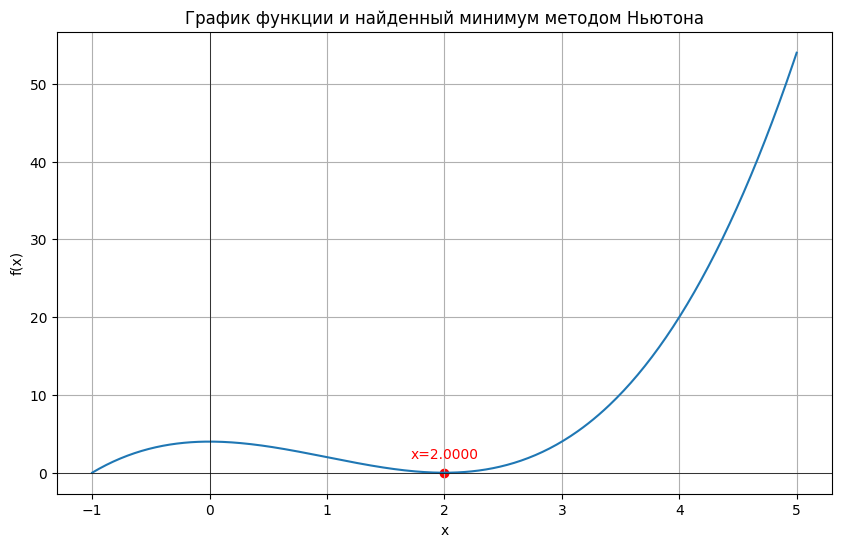

Начальное приближение (x0): 2.7853
Шаг градиентного спуска (lr): 0.1521
Точка минимума (x): 2.0000
Значение функции в минимуме (f(x)): 0.0000


In [64]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**3 - 3*x**2 + 4
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        derivative = df.subs(x, x_curr)
        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            print(f"Остановка по достижении epsilon на итерации {i+1}")
            return x_new, trace
        if abs(derivative) < delta:
            print(f"Остановка по достижении delta на итерации {i+1}")
            return x_new, trace
        x_curr = x_new

    print("Достигнуто максимальное количество итераций")
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    lr = random.uniform(0.01, 0.2)
    xm, trace = gradient_descent(x0, lr, 1e-7, 1e-3, 10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, lr, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, lrb, xmb = res[0]

    X = np.linspace(-10, 5, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='f(x) = x^3 - 3x^2 + 4')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

    print(f"Начальное приближение (x0): {x0b:.4f}")
    print(f"Шаг градиентного спуска (lr): {lrb:.4f}")
    print(f"Точка минимума (x): {xmb:.4f}")
    print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

Остановка по достижении delta на итерации 23
Остановка по достижении delta на итерации 153
Остановка по достижении delta на итерации 202
Остановка по достижении delta на итерации 95
Остановка по достижении delta на итерации 24
Остановка по достижении delta на итерации 33
Остановка по достижении delta на итерации 54
Остановка по достижении delta на итерации 33
Остановка по достижении delta на итерации 77
Остановка по достижении delta на итерации 63


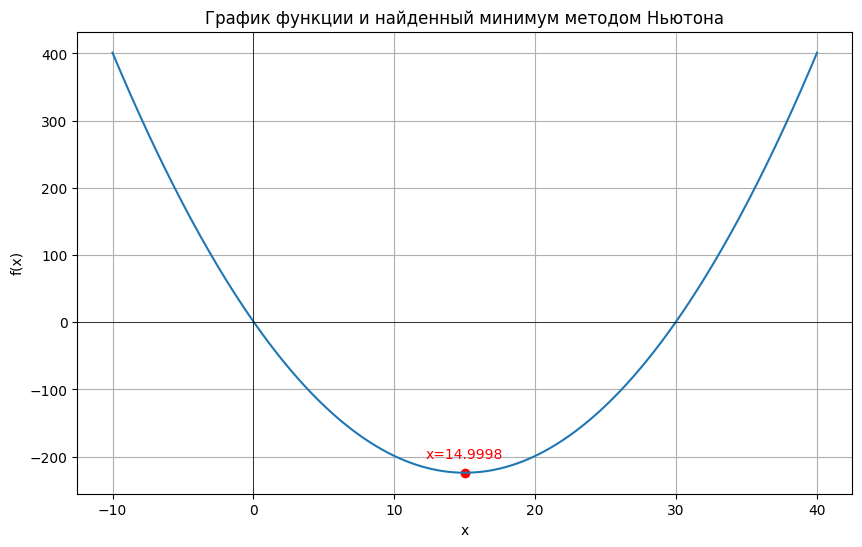

Начальное приближение (x0): -2.1976
Шаг градиентного спуска (lr): 0.1861
Точка минимума (x): 14.9998
Значение функции в минимуме (f(x)): -224.0000


In [76]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        derivative = df.subs(x, x_curr)
        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            print(f"Остановка по достижении epsilon на итерации {i+1}")
            return x_new, trace
        if abs(derivative) < delta:
            print(f"Остановка по достижении delta на итерации {i+1}")
            return x_new, trace

        x_curr = x_new

    print("Достигнуто максимальное количество итераций")
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    lr = random.uniform(0.01, 0.2)
    xm, trace = gradient_descent(x0, lr, 1e-7, 1e-3, 10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, lr, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, lrb, xmb = res[0]

    X = np.linspace(-10, 40, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='f(x) = x^3 - 3x^2 + 4')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()


    print(f"Начальное приближение (x0): {x0b:.4f}")
    print(f"Шаг градиентного спуска (lr): {lrb:.4f}")
    print(f"Точка минимума (x): {xmb:.4f}")
    print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Остановка по достижении delta на итерации 969
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций
Достигнуто максимальное количество итераций


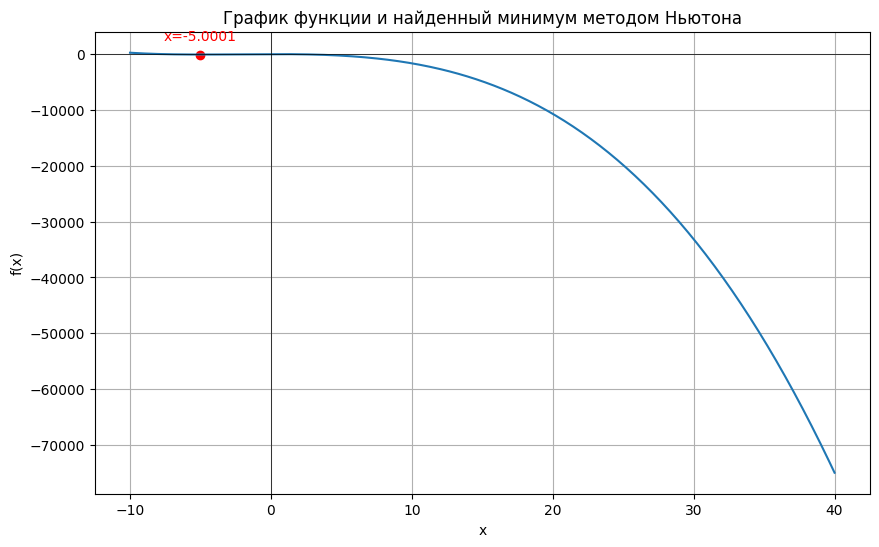

Начальное приближение (x0): -4.7220
Шаг градиентного спуска (lr): 0.1245
Точка минимума (x): -5.0001
Значение функции в минимуме (f(x)): -58.0000


In [77]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = -x**3 + 5*x - 7*x**2 + 17
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        derivative = df.subs(x, x_curr)
        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            print(f"Остановка по достижении epsilon на итерации {i+1}")
            return x_new, trace
        if abs(derivative) < delta:
            print(f"Остановка по достижении delta на итерации {i+1}")
            return x_new, trace
        x_curr = x_new

    print("Достигнуто максимальное количество итераций")
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    lr = random.uniform(0.01, 0.2)
    xm, trace = gradient_descent(x0, lr, 1e-7, 1e-3, 10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, lr, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, lrb, xmb = res[0]

    X = np.linspace(-10, 40, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='f(x) = x^3 - 3x^2 + 4')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()


    print(f"Начальное приближение (x0): {x0b:.4f}")
    print(f"Шаг градиентного спуска (lr): {lrb:.4f}")
    print(f"Точка минимума (x): {xmb:.4f}")
    print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

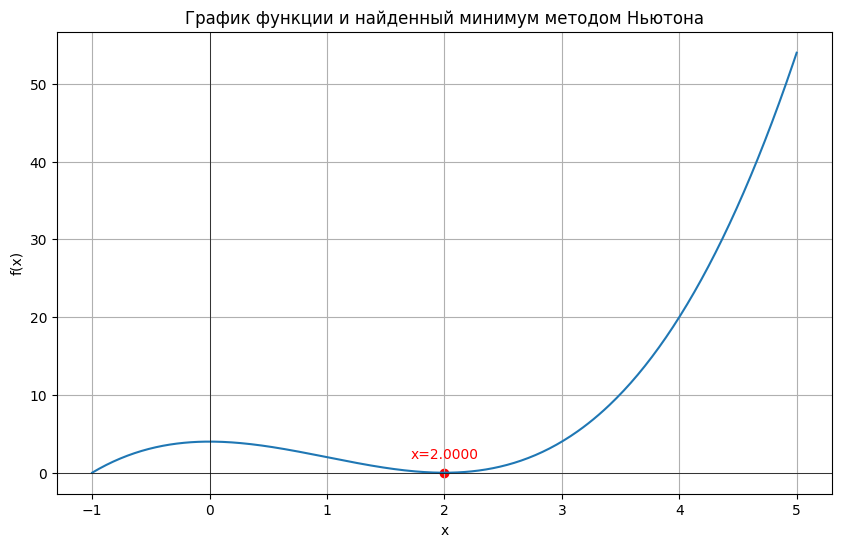

Найденный минимум:
Начальное приближение (x0): 4.6581
Точка минимума (x): 2.0000
Значение функции в минимуме (f(x)): 0.0000


In [63]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**3 - 3*x**2 + 4
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, num_iterations=10000):

    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        f_prime = df.subs(x, x_curr)
        f_double_prime = ddf.subs(x, x_curr)
        if f_double_prime == 0:
            return x_curr, trace
        x_new = x_curr - f_prime / f_double_prime
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        if abs(f_prime) < delta:
            return x_new, trace
        x_curr = x_new
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    xm, trace = newton_method(x0, epsilon=1e-7, delta=1e-3, num_iterations=10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, xmb = res[0]


X = np.linspace(-1, 5, 400)
Y = f_lmbd(X)
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='f(x) = x^3 - 3x^2 + 4')
plt.scatter(xmb, fmin, color='red')
plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('График функции и найденный минимум методом Ньютона')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

print(f"Найденный минимум:")
print(f"Начальное приближение (x0): {x0b:.4f}")
print(f"Точка минимума (x): {xmb:.4f}")
print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

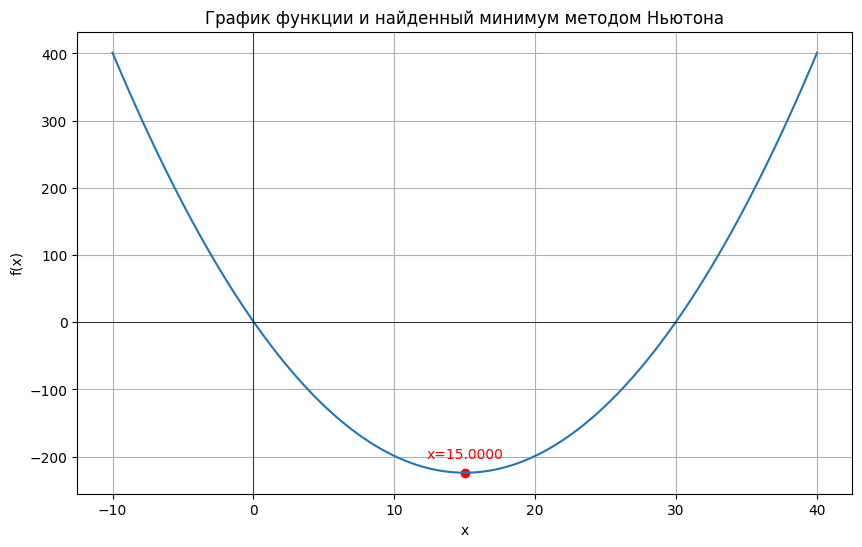

Найденный минимум:
Начальное приближение (x0): 4.1641
Точка минимума (x): 15.0000
Значение функции в минимуме (f(x)): -224.0000


In [70]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, num_iterations=10000):

    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        f_prime = df.subs(x, x_curr)
        f_double_prime = ddf.subs(x, x_curr)
        if f_double_prime == 0:
            return x_curr, trace
        x_new = x_curr - f_prime / f_double_prime
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        if abs(f_prime) < delta:
            return x_new, trace
        x_curr = x_new
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    xm, trace = newton_method(x0, epsilon=1e-7, delta=1e-3, num_iterations=10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, xmb = res[0]


    X = np.linspace(-10, 40, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='$f(x) = x^3 - 3x^2 + 4')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

print(f"Найденный минимум:")
print(f"Начальное приближение (x0): {x0b:.4f}")
print(f"Точка минимума (x): {xmb:.4f}")
print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

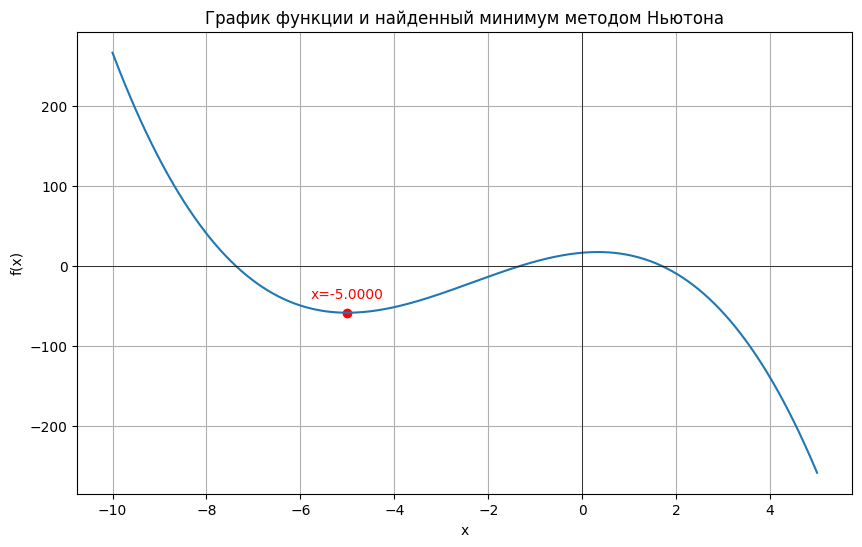

Найденный минимум:
Начальное приближение (x0): -4.6128
Точка минимума (x): -5.0000
Значение функции в минимуме (f(x)): -58.0000


In [71]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = -x**3 + 5*x - 7*x**2 + 17
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, num_iterations=10000):

    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        f_prime = df.subs(x, x_curr)
        f_double_prime = ddf.subs(x, x_curr)
        if f_double_prime == 0:
            return x_curr, trace
        x_new = x_curr - f_prime / f_double_prime
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        if abs(f_prime) < delta:
            return x_new, trace
        x_curr = x_new
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    xm, trace = newton_method(x0, epsilon=1e-7, delta=1e-3, num_iterations=10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, xmb = res[0]


    X = np.linspace(-10, 5, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='$f(x) = x^3 - 3x^2 + 4$')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

print(f"Найденный минимум:")
print(f"Начальное приближение (x0): {x0b:.4f}")
print(f"Точка минимума (x): {xmb:.4f}")
print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

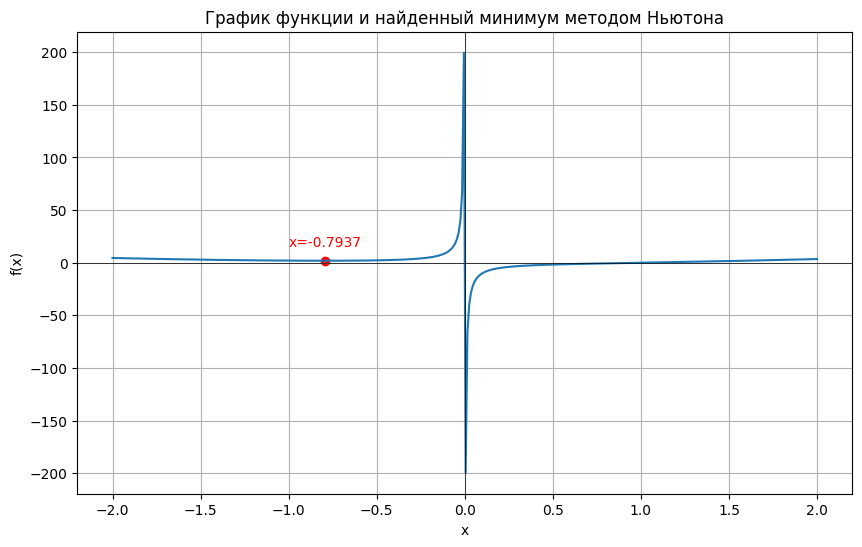

Найденный минимум:
Начальное приближение (x0): 3.6721
Точка минимума (x): -0.7937
Значение функции в минимуме (f(x)): 1.8899


In [72]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**2 - 1/x
df = sp.diff(f, x)
ddf = sp.diff(df, x)
f_lmbd = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, num_iterations=10000):

    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        f_prime = df.subs(x, x_curr)
        f_double_prime = ddf.subs(x, x_curr)
        if f_double_prime == 0:
            return x_curr, trace
        x_new = x_curr - f_prime / f_double_prime
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        if abs(f_prime) < delta:
            return x_new, trace
        x_curr = x_new
    return x_curr, trace

num_runs = 10
res = []

for _ in range(num_runs):
    x0 = random.uniform(-5, 5)
    xm, trace = newton_method(x0, epsilon=1e-7, delta=1e-3, num_iterations=10000)
    second_derivative = ddf.subs(x, xm)
    if second_derivative > 0:
        res.append((f_lmbd(xm), x0, xm))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, xmb = res[0]


    X = np.linspace(-2, 2, 400)
    Y = f_lmbd(X)
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='$f(x) = x^3 - 3x^2 + 4$')
    plt.scatter(xmb, fmin, color='red')
    plt.annotate(f"x={xmb:.4f}", (xmb, fmin), xytext=(0, 10),
             textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('График функции и найденный минимум методом Ньютона')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

print(f"Найденный минимум:")
print(f"Начальное приближение (x0): {x0b:.4f}")
print(f"Точка минимума (x): {xmb:.4f}")
print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

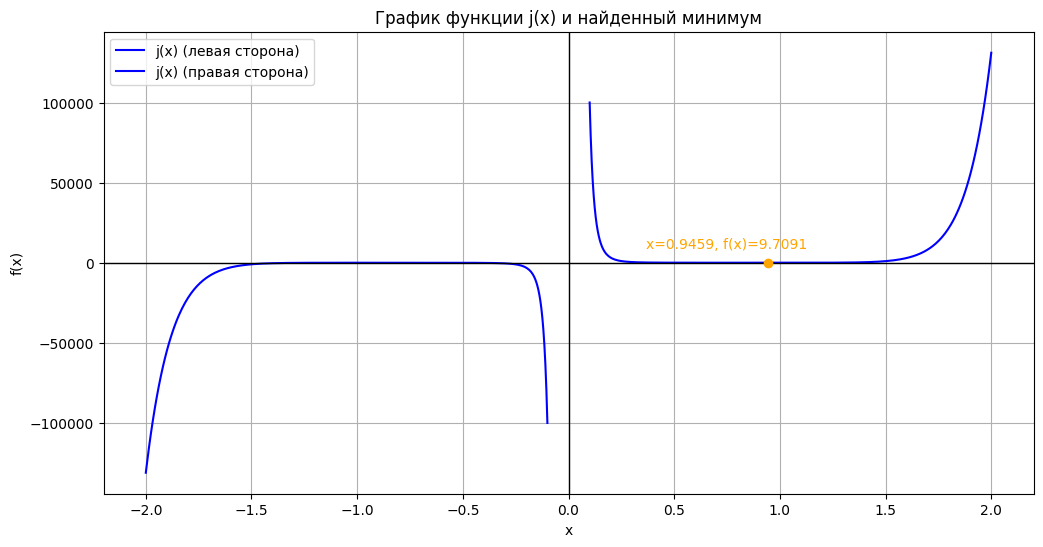

Найденный минимум:
Начальное приближение (x0): 0.7934
Точка минимума (x): 0.9459
Значение функции в минимуме (f(x)): 9.7091


In [75]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
j = x**17 + 1/x**5 + 8
jprime = sp.diff(j, x)
jsecond = sp.diff(j, x, 2)
j_lmbd = sp.lambdify(x, j, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, num_iterations=10000):
    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        f_prime = jprime.subs(x, x_curr)
        f_double_prime = jsecond.subs(x, x_curr)
        if f_double_prime == 0:
            return x_curr, trace
        x_new = x_curr - f_prime / f_double_prime
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace
        if abs(f_prime) < delta:
            return x_new, trace
        x_curr = x_new
    return x_curr, trace


num_runs = 10
res = []
for _ in range(num_runs):
    x0 = random.uniform(0.1, 2)
    xm, trace = newton_method(x0, epsilon=1e-7, delta=1e-3, num_iterations=10000)
    second_derivative = jsecond.subs(x, xm)
    if second_derivative > 0:
        res.append((j_lmbd(float(xm)), x0, float(xm)))

if res:
    res.sort(key=lambda v: v[0])
    fmin, x0b, xmb = res[0]

X_neg = np.linspace(-2, -0.1, 400)
X_pos = np.linspace(0.1, 2, 400)

plt.figure(figsize=(12, 6))
Y_neg = j_lmbd(X_neg)
plt.plot(X_neg, Y_neg, label='j(x) (левая сторона)', color='blue')
Y_pos = j_lmbd(X_pos)
plt.plot(X_pos, Y_pos, label='j(x) (правая сторона)', color='blue')
if res:
    plt.scatter(xmb, fmin, color='orange', zorder=5)
    plt.annotate(f"x={xmb:.4f}, f(x)={fmin:.4f}", (xmb, fmin), xytext=(-30, 10),
                 textcoords="offset points", ha='center', color='orange')
plt.title("График функции j(x) и найденный минимум")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.legend()
plt.show()


print(f"Найденный минимум:")
print(f"Начальное приближение (x0): {x0b:.4f}")
print(f"Точка минимума (x): {xmb:.4f}")
print(f"Значение функции в минимуме (f(x)): {fmin:.4f}")

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [92]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

In [ ]:
Сабрина Садиех	@sabrina_sadiekh